In [99]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import special

In [100]:
##load data
path = r"C:/Users/14131/Desktop";
data = [];
p = ["1p0", "1p5", "2p0"];
for i in range(3):
    data.append(np.loadtxt(path + r"/g_" + p[i] + ".txt"));

In [101]:
#data form
#real_part
#imag_part
#real_part
#...
#delta t = 0.5
#handle data
for i in range(3):
    data[i] = data[i][0:800:2] + 1j * data[i][1:800:2];

In [102]:
color_cycle = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf'];

In [103]:
#Semi-classical results by Sachdev 
#Only useful for g = 1.5 and g = 2.0
t= np.arange(0, 200, 0.5);
delta = [-1.0, -2.0];
K=[];
R = [];
for i in range(2):
    K = (np.power(abs(delta[i]), 0.25) * np.exp(1j * delta[i] * t) * np.sqrt(1/ (2 * np.pi *1j * abs(delta[i]) *t[:] )));
    tau = 1/(2.0 * 1.0/20.0 / np.pi * np.exp(-abs(delta[i]) * 20));
    R.append(K[:] * np.exp(t[:] / tau));

c:\users\14131\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
c:\users\14131\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
c:\users\14131\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


In [104]:
#Get the <sigma(-t)sigma(0)> by complex conjugate.
full_corre = [];
for i in range(3):
    temp = np.zeros(1 + 399 * 2, dtype = complex);
    for j in range(400):
        temp[399 - j] = data[i][j].conjugate();
        temp[399 + j] = data[i][j];
    full_corre.append(temp);

In [105]:
#fourier transformation
omega = [];
for i in range(3):
    temp = np.fft.fft(full_corre[i]);
    temp = np.fft.fftshift(temp);
    omega.append(temp);
print(len(data[0]))

400


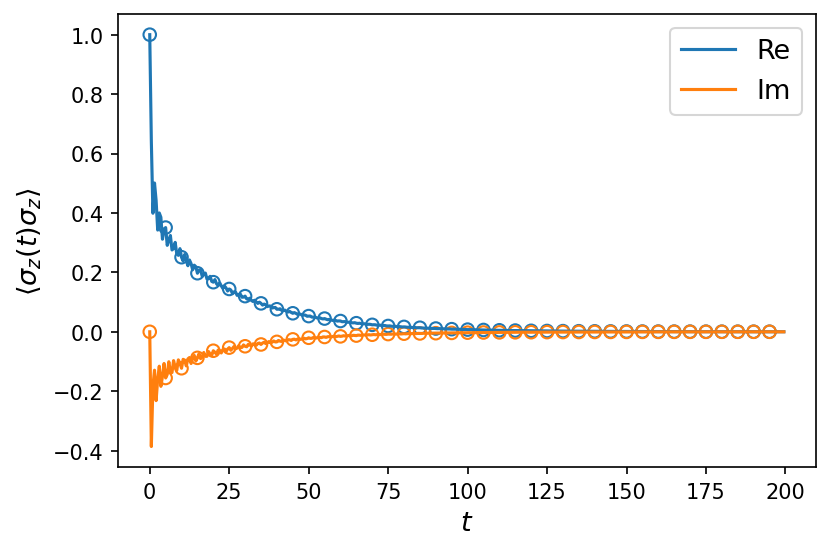

In [106]:
#plot figures
#g = 1.0
plt.figure(dpi = 150);
plt.plot(np.arange(0,200, 0.5), data[0].real, color = color_cycle[0], label = r"Re");
plt.scatter(np.arange(0,200, 0.5)[0::10], data[0].real[0::10], facecolor= "None", edgecolor = color_cycle[0]);
plt.plot(np.arange(0,200, 0.5), data[0].imag, color = color_cycle[1], label = r"Im");
plt.scatter(np.arange(0,200, 0.5)[0::10], data[0].imag[0::10], facecolor= "None", edgecolor = color_cycle[1]);
plt.xlabel(r"$t$", fontsize = 13);
plt.ylabel(r"$\langle \sigma_z(t)\sigma_z \rangle$", fontsize = 13);
plt.legend(fontsize = 13);
plt.show();

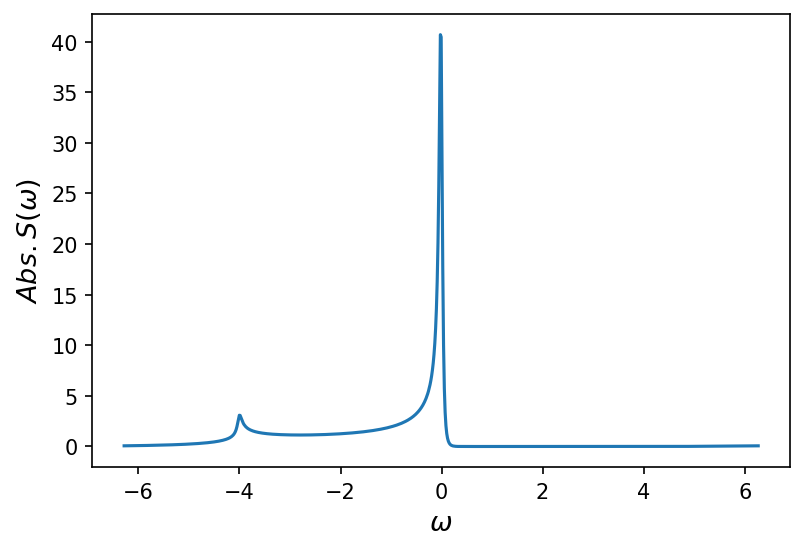

In [107]:
#g = 1.0; S(w);
plt.figure(dpi = 150);
plt.plot(np.arange(-2 * np.pi, 2 * np.pi, 4 * np.pi / (399 * 2 + 1)), abs(omega[0]));
plt.xlabel(r"$\omega$", fontsize = 13);
plt.ylabel(r"$Abs.S(\omega)$", fontsize = 13);
plt.show();

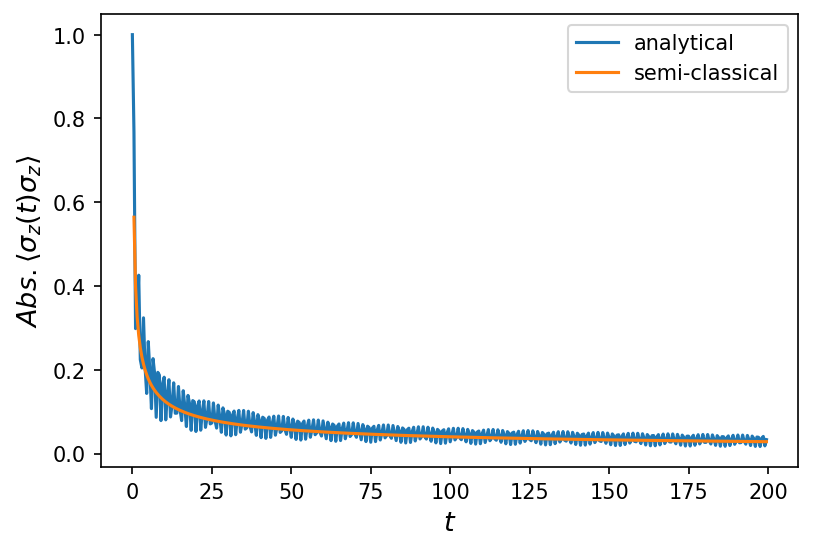

In [108]:
#g = 1.5
plt.figure(dpi = 150);
plt.plot(np.arange(0,200, 0.5), abs(data[1]), color = color_cycle[0], label = r"analytical");
plt.plot(np.arange(0,200, 0.5), abs(R[0]), color = color_cycle[1], label = r"semi-classical");
#plt.scatter(np.arange(0,200.5, 0.5)[0::10], abs(data[1])[0::10], facecolor= "None", edgecolor = color_cycle[0]);
plt.xlabel(r"$t$", fontsize = 13);
plt.ylabel(r"$Abs.\langle \sigma_z(t)\sigma_z \rangle$", fontsize = 13);
plt.legend();
plt.show();

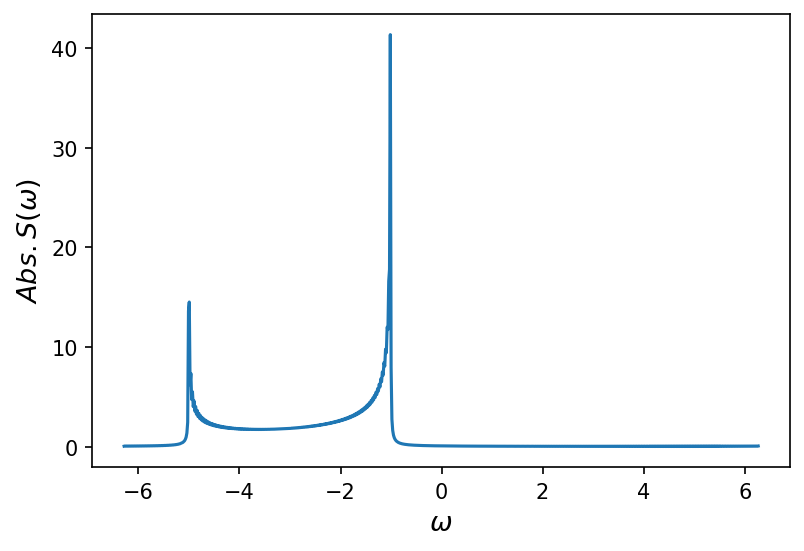

In [109]:
#g = 1.5; S(w);
plt.figure(dpi = 150);
plt.plot(np.arange(-2 * np.pi, 2 * np.pi, 4 * np.pi / (399 * 2 + 1)), abs(omega[1]));
plt.xlabel(r"$\omega$", fontsize = 13);
plt.ylabel(r"$Abs.S(\omega)$", fontsize = 13);
plt.show();

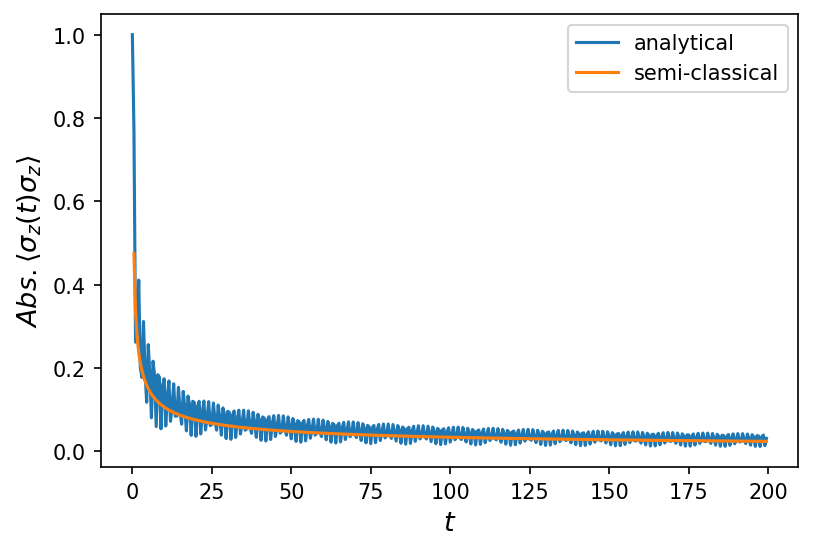

In [110]:
#g = 2.0
plt.figure(dpi = 150);
plt.plot(np.arange(0,200, 0.5), abs(data[2]), color = color_cycle[0], label = r"analytical");
plt.plot(np.arange(0,200, 0.5), abs(R[1]), color = color_cycle[1], label = r"semi-classical");
#plt.scatter(np.arange(0,200.5, 0.5)[0::10], abs(data[1])[0::10], facecolor= "None", edgecolor = color_cycle[0]);
plt.xlabel(r"$t$", fontsize = 13);
plt.ylabel(r"$Abs.\langle \sigma_z(t)\sigma_z \rangle$", fontsize = 13);
plt.legend();
plt.show();

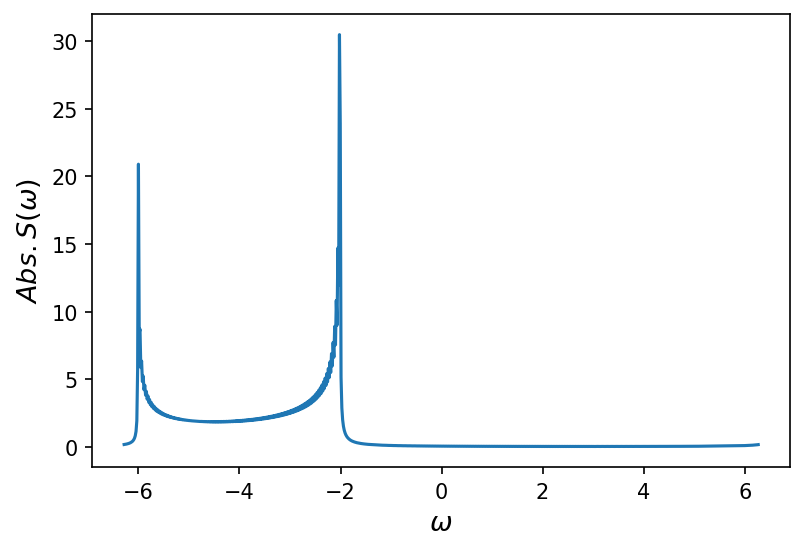

In [111]:
#g = 2.0; S(w);
plt.figure(dpi = 150);
plt.plot(np.arange(-2 * np.pi, 2 * np.pi, 4 * np.pi / (399 * 2 + 1)), abs(omega[2]));
plt.xlabel(r"$\omega$", fontsize = 13);
plt.ylabel(r"$Abs.S(\omega)$", fontsize = 13);
plt.show();

In [112]:
#load data
path = r"C:/Users/14131/Desktop";
data1 = [];
p = ["1p0", "1p5", "2p0"];
for i in range(3):
    data1.append(np.loadtxt(path + r"/g_" + p[i]+"_tau_N_501.txt"));

In [113]:
#data form : correlation function in imaginary time are real
#real
#real 
#...

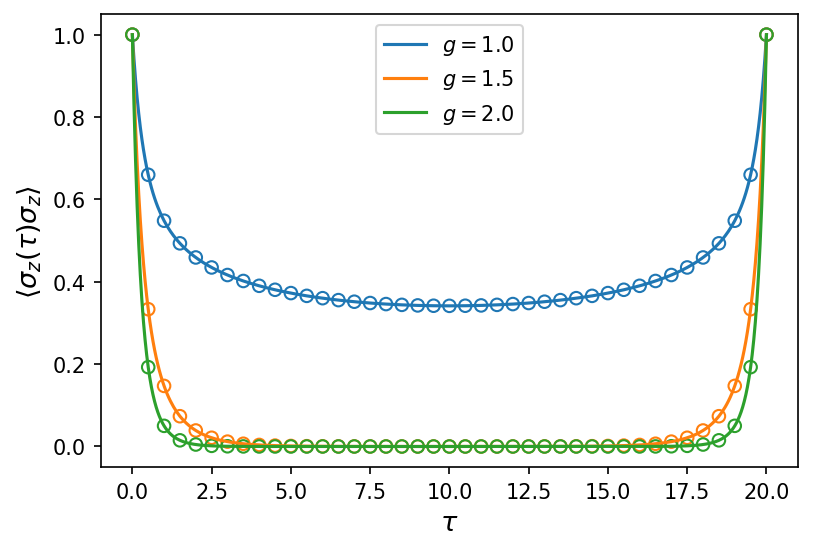

In [115]:
g = [1.0, 1.5, 2.0];
plt.figure(dpi = 150);
for i in range(3):
    plt.plot(np.arange(0, 20.05, 0.05), data1[i], color = color_cycle[i], label = r"$g = $" + str(g[i]));
    plt.scatter(np.arange(0, 20.05, 0.05)[0::10], data1[i][0::10], facecolor = "None", edgecolor = color_cycle[i])
plt.legend();
plt.ylabel(r"$\langle   \sigma_z(\tau)\sigma_z \rangle$", fontsize = 13);
plt.xlabel(r"$\tau$", fontsize = 13)
plt.show();